**420-A58-SF - Algorithmes d'apprentissage non supervisé - Hiver 2023 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2023 Mikaël Swawola
<br/>
![Examen #1 - Segmentation du marché](static/exam1-banner.png)
<br/>

# À propos de l'examen

* **Date et heure**: Mercredi 19 avril 2023 de 18h30 à 22h00
* **Pondération**: 30%
* **Tous les documents sont autorisés**
* **Il s'agit d'un travail individuel. Toute collaboration (avec quiconque!) et plagiat sont strictement interdits. Le non respect de cette consigne entraînera une note de 0 à l'examen**.
* L'examen est noté sur 100 points
* Remettre ce fichier complété de vos réponses sur la plateforme Lea au plus tard à 22h00. <span style="color:red;">**Une pénalité de 5 points par minute excédentaire entamée sera appliquée.**</span>

---
# Avant de commencer

* Cet examen couvre les chapitres 01-01 à 01-05 du cours *420-A58-SF - Apprentisage non supervisé*. Des éléments du *cours 420-A55-SF - Analyse exploratoire des données* relatifs à l'apprentissage non supervisé sont requis (ACP).
* Le jeu de données est considéré comme préparé. Il ne contient par exemple ni valeurs abérrantes, ni données manquantes. **Ne mélangez (shuffle) pas les données!**
* Vous devrez rendre ce fichier complété de **vos réponses et de votre code** sur la plateforme Lea à la fin de l'examen.
* Renommez le présent fichier en incluant vos noms et prénoms. Exemple: **Examen1_&lt;nom_prenom&gt;.ipynb**
* Lisez bien les questions et **<span style="color:green;">bon succès à tous !</span>**

---
# Description de la problématique

La **segmentation de marché** consiste au découpage d'un marché de clients en sous-groupes similaires. Ceci permet alors la mise en oeuvre de stratégies marketing spécifiques (ciblées) à chaque sous-groupe de client.

Les méthodes de **partitionnement de données** que nous avons vu en cours sont extrèmement populaire en segmentation de marché. Pour ce problème, nous verrons comment celles-ci sont utilisées pour découvrir des sous-groupes de clients similaires dans la catégorie appartennant au programme de fidélisation de la compagnie aérienne fictive **AirAlgo**.
L'objectif de la compagnie est d'en apprendre plus sur ses clients afin de pouvoir cibler différents segments de clientèle avec différents types d'offres de miles.

Le jeu de données est contenu dans le fichier `AirAlgo.csv`. Les informations sur les membres du programme "Frequent Flyer" y sont représentées sous forme tabulaire (lignes, colonnes). Ce jeu de données est issu de l'ouvrage ["Data Mining for Business Intelligence," par Galit Shmueli, Nitin R. Patel, et Peter C. Bruce](https://www.safaribooksonline.com/library/view/data-mining-for/9780470526828/). Cette référence est donnée à titre de citation des sources et n'est pas requise pour la réalisation de l'examen.

Les variables associées aux observations sont les suivantes:

| Nom de la variable  | Description de la variable  |
|---|---|
|Balance   | Nombre de miles éligibles pour des récompenses de voyages  |
|QualMiles  | Nombre de miles qualifiant pour le status "TopFlight"  |
|BonusMiles | Nombre de miles obtenus à partir de bonus sur transactions hors vols (12 derniers mois)  |
|BonusTrans | Nombre de bonus sur transactions hors vols (12 derniers mois)  |
|FlightMiles | Nombre de miles (vols) (12 derniers mois)  |
|FlightTrans | Nombre de transactions de vols (12 derniers mois)  |
|DaysSinceEnroll | Nombre de jours depuis l'inscription au programme "Frequent flyer"  |

---
# 1 - Exploration sommaire des données (10 points)

### Question 1-1 - Combien d'observations (membres du programme "Frequent Flyer") contient le jeu de données ? (2.5 points)

### ----- Votre réponse ci-dessous -----

In [1]:
import pandas as pd
df = pd.read_csv('../../data/AirAlgo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Balance          3999 non-null   int64
 1   QualMiles        3999 non-null   int64
 2   BonusMiles       3999 non-null   int64
 3   BonusTrans       3999 non-null   int64
 4   FlightMiles      3999 non-null   int64
 5   FlightTrans      3999 non-null   int64
 6   DaysSinceEnroll  3999 non-null   int64
dtypes: int64(7)
memory usage: 218.8 KB


### Question 1-2 - Combien de variables y a-t-il ? Quelle est la nature (quantitative ou qualitative) de chacune des variables ? (2.5 points)

### ----- Votre réponse ci-dessous -----

7 - quantitatives

### Question 1-3 - Quelles sont les deux variables ayant en moyenne les valeurs les plus faibles ? (2.5 points)

### ----- Votre réponse ci-dessous -----

In [2]:
df.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [ ]:
FlightTrans et BonusTrans

### Question 1-4 - Quelles sont les deux variables ayant en moyenne les valeurs les plus élevées ? (2.5 points)

### ----- Votre réponse ci-dessous -----

In [ ]:
Balance et BonusMiles

---
# 2 - Mise à l'échelle des données (10 points)

### Question 2-1 - Sachant que nous allons appliquer des techniques de partitionnement, pourquoi est-il nécéssaire de mettre les données à l'échelle (standardiser, normaliser, ...)? Justifier votre réponse. (5 points)

### ----- Votre réponse ci-dessous -----

### Question 2-2 - Quelle variable à la valeur la plus basse sur les données mises à l'échelle ? (2.5 points)

### ----- Votre réponse ci-dessous -----

In [3]:
df_std = (df - df.mean(axis=0))/df.std(axis=0)
df_std.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,2.842882e-17,3.731282e-17,-2.842882e-17,-5.685763e-17,-1.776801e-18,2.132161e-17,5.685763e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.303482e-01,-1.862754e-01,-7.099031e-01,-1.208052e+00,-3.285622e-01,-3.621226e-01,-1.993361e+00
25%,-5.464993e-01,-1.862754e-01,-6.581453e-01,-8.956758e-01,-3.285622e-01,-3.621226e-01,-8.660740e-01
50%,-3.026954e-01,-1.862754e-01,-4.129792e-01,4.145225e-02,-3.285622e-01,-3.621226e-01,-1.092393e-02
75%,1.865795e-01,-1.862754e-01,2.755854e-01,5.620789e-01,-1.064525e-01,-9.849101e-02,8.096037e-01
max,1.618681e+01,1.422308e+01,1.020829e+01,7.746727e+00,2.168029e+01,1.361035e+01,2.022842e+00


DaysSinceEnroll (-1.99)

### Question 2-3 - Quelle variable à la valeur la plus élevée sur les données mises à l'échelle ? (2.5 points)

### ----- Votre réponse ci-dessous -----

FlightMiles (21.69)

---
# 3 - Partitionnement hiérarchique (40 points)

### Question 3-1 - Effectuer un partitionnement hiérarchique et afficher le dendrogramme correspondant. Vous devrez sélectionner la méthode de lien la mieux adaptée. L'affichage peut se faire en utilisant la fonction plot_dendrogram (fichier helpers.py). Le paramètre no_labels peut être mis à `True` afin de réduire le temps d'affichage (ce jeu de données n'a de toute façon pas d'étiquettes !). (5 points)

### ----- Votre réponse ci-dessous -----

In [12]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
# Configuration de la visualisation
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.figsize']=(10,6)

In [30]:
from sklearn.cluster import AgglomerativeClustering
clust_ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="ward").fit(df_std)

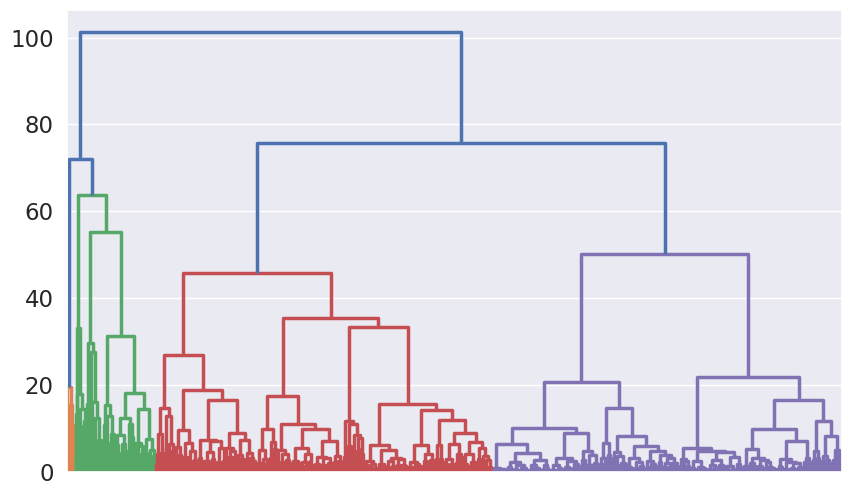

In [31]:
from helpers import plot_dendrogram
plot_dendrogram(clust_ward, truncate_mode='level', no_labels=True)

### Question 3-2 - Un spécialiste en marketing de la compagnie AirAlgo vous suggère la présence de 3 sous groupes de clients. En considérant le dendrogramme obtenu précédemment, vous estimez que ce chiffre n'est pas adéquat. Que pourraient être les valeurs alternatives et pourquoi ? (5 points)

### ----- Votre réponse ci-dessous -----

4,5 ou 8

### Question 3-3 - Satisfaits de vos résultats précédents, vous réuississez à convaincre le spécialiste Marketing qu'il existe cinq sous-groupes de clients. Ré-effectuez le partitionnement hiérarchique avec le nombre adéquat de partitions. Combien de clients composent la première partition (celle d'indice 0)?  (5 points)

### ----- Votre réponse ci-dessous -----

In [32]:
clust_5 = AgglomerativeClustering(distance_threshold=None, n_clusters=5).fit(df_std)

In [37]:
(clust_5.labels_ == 0).sum()

360

360.0

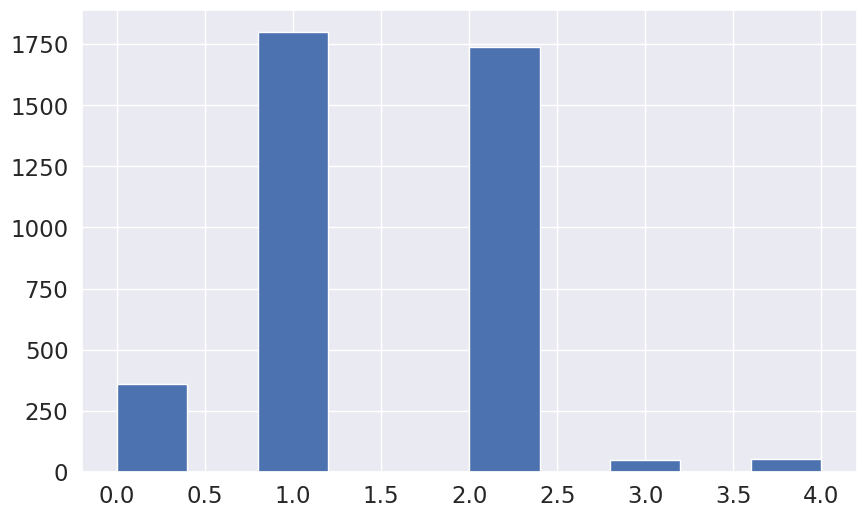

In [40]:
plt.hist(clust_5.labels_)[0][0]

### Question 3-4 - Calculez le centroïde de la première partition. Remarque: afin de faciliter l'interprétation à venir, vous devez le calculer sur les données non mises à l'échelle. (5 points)

### ----- Votre réponse ci-dessous -----

In [43]:
df[(clust_5.labels_ == 0)].mean()

Balance            204316.227778
QualMiles             144.711111
BonusMiles          36265.022222
BonusTrans             19.802778
FlightMiles          2286.719444
FlightTrans             6.744444
DaysSinceEnroll      4744.158333
dtype: float64

### Question 3-5 - En vous basant sur la question précédente, comparez les centroïdes des partitions retenues. Pour aider, vous pouvez créer une trame de données dont les lignes correspondent aux partitions et les colonnes aux variables. La première partition (d'indice 0) montre les valeurs moyennes les plus élevées pour 3 des variables. Lesquelles ? (5 points)

### ----- Votre réponse ci-dessous -----

In [44]:
centroides = [df[(clust_5.labels_ == 0)].mean(),
              df[(clust_5.labels_ == 1)].mean(),
              df[(clust_5.labels_ == 2)].mean(),
              df[(clust_5.labels_ == 3)].mean(),
              df[(clust_5.labels_ == 4)].mean()]

In [46]:
results = pd.DataFrame(centroides)
results.index.name = "Centroïdes" 
results

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
Centroïdes,,,,,,,
0,204316.227778,144.711111,36265.022222,19.802778,2286.719444,6.744444,4744.158333
1,37353.074403,0.882288,3651.923931,4.246530,137.491394,0.451416,3402.970572
2,79910.013241,123.694876,26735.156592,16.832470,148.672424,0.483592,4727.468048
3,135318.020833,5870.062500,16406.000000,12.645833,974.770833,3.270833,4320.375000
4,154830.603774,490.716981,32137.018868,33.471698,8752.622642,23.679245,4046.830189


### Question 3-6 - Quelle description représente le mieux la première partition (indice 0) ? Justifiez votre réponse. (5 points)

#### A - Nouveaux clients n'utilisant pas les vols très souvent.
#### B - Clients ayant accumulé un grand nombre de miles, la plupart par des transactions hors vols.
#### C - Clients fidèles n'utilisant pas les lignes fréquemment.
#### D - Clients ayant accumulé un grand nombre de miles et ayant le plus voyagé avec la compagnie.
#### E - Clients récents accumulant des miles, la plupart par des transactions hors vols.

### ----- Votre réponse ci-dessous -----

In [ ]:
B

In [47]:
results

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
Centroïdes,,,,,,,
0,204316.227778,144.711111,36265.022222,19.802778,2286.719444,6.744444,4744.158333
1,37353.074403,0.882288,3651.923931,4.246530,137.491394,0.451416,3402.970572
2,79910.013241,123.694876,26735.156592,16.832470,148.672424,0.483592,4727.468048
3,135318.020833,5870.062500,16406.000000,12.645833,974.770833,3.270833,4320.375000
4,154830.603774,490.716981,32137.018868,33.471698,8752.622642,23.679245,4046.830189


### Question 3-7 - Quelle description représente le mieux le deuxième cluster (indice 1) ?  Justifiez votre réponse. (5 points)


#### A - Clients récents accumulant des miles, la plupart par des transactions hors vols.
#### B - Clients ayant accumulé un grand nombre de miles, la plupart par des transactions hors vols.
#### C - Clients fidèles n'utilisant pas les lignes fréquemment.
#### D - Nouveaux clients n'utilisant pas les vols très souvent.
#### E - Clients ayant accumulé un grand nombre de miles et ayant le plus voyagé avec la compagnie.


### ----- Votre réponse ci-dessous -----

C ou A

In [48]:
results

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
Centroïdes,,,,,,,
0,204316.227778,144.711111,36265.022222,19.802778,2286.719444,6.744444,4744.158333
1,37353.074403,0.882288,3651.923931,4.246530,137.491394,0.451416,3402.970572
2,79910.013241,123.694876,26735.156592,16.832470,148.672424,0.483592,4727.468048
3,135318.020833,5870.062500,16406.000000,12.645833,974.770833,3.270833,4320.375000
4,154830.603774,490.716981,32137.018868,33.471698,8752.622642,23.679245,4046.830189


### Question 3-8 - Quelle description représente le mieux la cinquième partition (indice 4) ?  Justifiez votre réponse. (5 points)


#### A - Clients récents accumulant des miles, la plupart par des transactions hors vols.
#### B - Clients ayant accumulé un grand nombre de miles, la plupart par des transactions hors vols.
#### C - Clients fidèles n'utilisant pas les lignes fréquemment.
#### D - Clients ayant accumulé un grand nombre de miles et ayant le plus voyagé avec la compagnie.
#### E - Nouveaux clients n'utilisant pas les vols très souvent.

### ----- Votre réponse ci-dessous -----

D

---
# 4 - Partitionnement en K-moyennes (20 points)

### Question 4-1 - En gardant le même nombre de partitions, appliquez l'algorithme des K-moyennes avec un seed de 2023. (15 points)

### ----- Votre réponse ci-dessous -----

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=100, random_state=2023).fit(df_std)

In [50]:
centroidesk = [df[(kmeans.labels_ == 0)].mean(),
              df[(kmeans.labels_ == 1)].mean(),
              df[(kmeans.labels_ == 2)].mean(),
              df[(kmeans.labels_ == 3)].mean(),
              df[(kmeans.labels_ == 4)].mean()]
results = pd.DataFrame(centroidesk)
results

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,191736.335664,471.566434,33093.335664,28.356643,5763.132867,16.769231,4666.412587
1,38166.024257,34.405094,6747.983020,7.639782,179.753790,0.555488,2282.297756
2,152879.304124,77.987113,51008.088918,21.315722,479.907216,1.457474,4915.533505
3,114012.175439,5543.333333,19196.684211,12.298246,939.771930,2.824561,3872.175439
4,57383.264192,55.064047,8752.533479,9.098253,213.425036,0.645560,5825.433042


### Question 4-2 - Quelle partition représente le mieux les clients ayant accumulé un grand nombre de miles par des transactions hors vols ? (5 points)

### ----- Votre réponse ci-dessous -----

Indice 2

---
# 5 - Visualisation des partitions (20 points)

### Question 5 - À l'aide d'une ACP, visualisez les partitions obtenues par l'algorithme des K-moyennes. Utilisez un élément distinctif (couleur, symbole, etc...) pour chaque partition. (20 points)

### ----- Votre réponse ci-dessous -----

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_std)
df_pca = pca.transform(df_std)
pca.explained_variance_ratio_

array([0.37900807, 0.19482266])

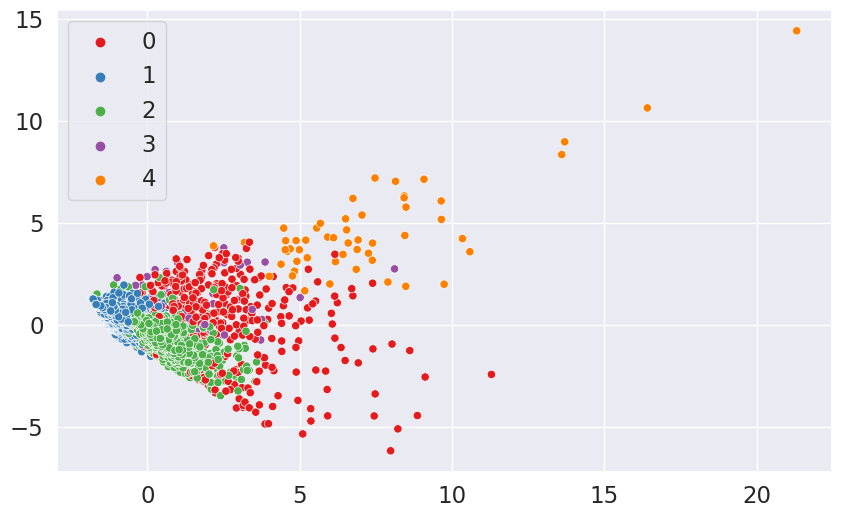

In [62]:
ax = sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=clust_5.labels_, palette="Set1")

# Fin de l'examen #1